<a href="https://colab.research.google.com/github/kamalahmadov474/Deep-Learning/blob/main/Speech_Recognition_using_Spectograms_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Install & import required libraries

In [ ]:
!pip install librosa matplotlib numpy tensorflow

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import os

2. Load the audio file

In [ ]:
audio_path = '/content/harvard.wav'  # adjust if different
y, sr = librosa.load(audio_path, sr=None)
print(f"Audio duration: {len(y)/sr:.2f} sec, Sampling rate: {sr}")

Audio duration: 18.36 sec, Sampling rate: 44100


3. Convert audio to mel spectrogram

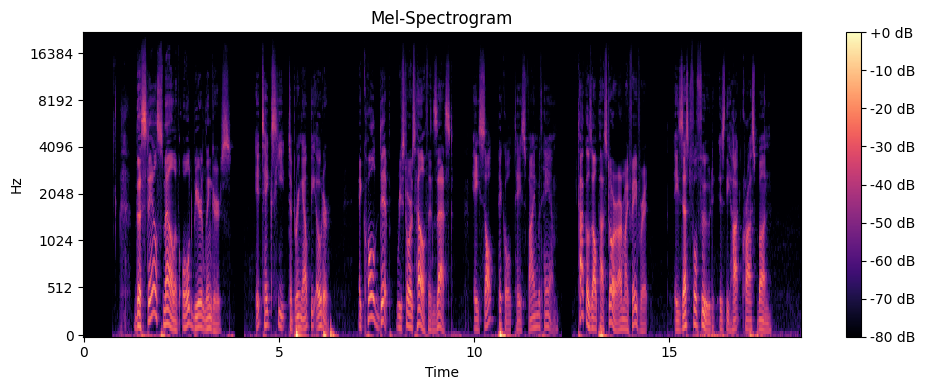

In [ ]:
def extract_mel_spectrogram(y, sr, n_mels=128, hop_length=512):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
    S_dB = librosa.power_to_db(S, ref=np.max)
    return S_dB

mel_spec = extract_mel_spectrogram(y, sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()


4. Slice spectrogram into segments (like images)

In [ ]:
def create_slices(spec, slice_width=32):
    slices = []
    for i in range(0, spec.shape[1] - slice_width, slice_width):
        slice_img = spec[:, i:i + slice_width]
        slices.append(slice_img)
    return np.array(slices)

spec_slices = create_slices(mel_spec)
print(f"Sliced spectrograms shape: {spec_slices.shape}")

# Reshape for CNN input
X = spec_slices[..., np.newaxis]  # Add channel dimension
y = np.random.randint(0, 2, size=(X.shape[0],))  # Dummy binary labels

Sliced spectrograms shape: (49, 128, 32)


5. Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Define CNN model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

7. Train the model

In [ ]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8833 - loss: 0.2176 - val_accuracy: 0.6000 - val_loss: 1.4116
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8349 - loss: 0.2007 - val_accuracy: 0.7000 - val_loss: 1.1267
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9004 - loss: 0.1656 - val_accuracy: 0.6000 - val_loss: 1.2470
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9175 - loss: 0.1635 - val_accuracy: 0.6000 - val_loss: 1.2926
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9554 - loss: 0.1667 - val_accuracy: 0.6000 - val_loss: 1.2758
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9175 - loss: 0.1734 - val_accuracy: 0.7000 - val_loss: 1.2388
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9279 - loss: 0.1668 - val_accuracy: 0.7000 - val_loss: 1.2026
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8900 - loss: 0.1677 - val_accuracy: 0.7000 - val_loss: 1.2

8. Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7000 - loss: 1.2745

Test accuracy: 0.70
